In [142]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np


# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
pd.set_option('display.mpl_style', 'default')
figsize(10, 3)

Populating the interactive namespace from numpy and matplotlib


In [143]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

df = pd.DataFrame(np.random.randn(8, 3), index=pd.date_range('1/1/2000', periods=8), columns=['A', 'B', 'C'])
wp = pd.Panel(np.random.randn(2, 5, 4), items=['Item1', 'Item2'], major_axis=pd.date_range('1/1/2000', periods=5), minor_axis=['A', 'B', 'C', 'D'])

In [144]:
s

a   -0.977629
b   -2.035755
c    0.183539
d    0.449169
e   -0.912494
dtype: float64

In [145]:
df

,A,B,C
2000-01-01,-1.068182,-0.041107,-0.832070
2000-01-02,-0.089876,0.243688,-0.554766
2000-01-03,0.225305,0.773564,-0.379461
2000-01-04,-0.738433,0.713150,2.189426
2000-01-05,0.424170,0.519910,0.836852
2000-01-06,-0.475131,0.466729,2.912739
2000-01-07,0.585026,0.409698,-0.541549
2000-01-08,1.802337,-1.135594,1.221049


In [146]:
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00
Minor_axis axis: A to D

In [148]:
wp.values

array([[[ 1.78062604, -0.5561296 , -1.24083385, -1.69864369],
        [ 0.16570595,  1.64809079,  0.35392043,  2.97868502],
        [ 0.53195908,  1.08378065,  0.02827696, -0.96342042],
        [-0.73237709,  0.66404344, -0.31906433,  0.22087613],
        [ 0.32413009, -0.69776956,  1.11874351, -0.2840771 ]],

       [[-0.20805447,  0.23383681,  1.72142242,  0.13723464],
        [ 0.40542011,  0.91984933, -0.19587539,  0.29822036],
        [-1.01098499, -0.12018224, -1.03538127,  1.04144064],
        [ 0.10205192, -2.54926848, -2.26022257,  0.98787313],
        [-0.74276415, -1.27796099,  1.66724149,  1.75382217]]])

In [153]:
df1 = pd.DataFrame({'x':[1,3,2], 'y':[2,4,1]})
df2 = pd.DataFrame({'x':[3,1,2], 'y':[0,2,2]})
print df1>=df2
print (df1>=df2).any(axis=1)
print (df1>=df2).all()


       x      y
0  False   True
1   True   True
2   True  False
0    True
1    True
2    True
dtype: bool
x    False
y    False
dtype: bool


In [170]:
# статистика
df = pd.DataFrame({'a':[0,0,1,1], 'b':['a','b','a','b']})
print df.describe()
print df.describe(include=['object']) # для категориальных

             a
count  4.00000
mean   0.50000
std    0.57735
min    0.00000
25%    0.00000
50%    0.50000
75%    1.00000
max    1.00000
        b
count   4
unique  2
top     b
freq    2


In [167]:
# комбинирование ДатаФреймов
df1 = pd.DataFrame({'x':[1,np.nan,2], 'y':[2,4,np.nan], 'z':[1,2,3]})
df2 = pd.DataFrame({'x':[20,40,np.nan], 'y':[2,4,20]})
print df1
print df2

print df1.combine_first(df2)

print df1.combineAdd(df2)

    x   y  z
0   1   2  1
1 NaN   4  2
2   2 NaN  3
    x   y
0  20   2
1  40   4
2 NaN  20
    x   y  z
0   1   2  1
1  40   4  2
2   2  20  3
    x   y  z
0  21   4  1
1  40   8  2
2   2  20  3


In [168]:
combiner = lambda x, y: np.where(pd.isnull(x), y, 100*x) # свой комбайнер
df1.combine(df2, combiner)

,x,y,z
0,100,200,100
1,40,400,200
2,200,20,300


In [9]:
# скользящее среднее
a = pd.DataFrame({'x':[1,2,3,1,2,3,1,2,3], 'y':[2,2,10,2,2,2,2,2,2]})
pd.rolling_mean(a, 2) # можно суммуб медиану и т.п.

,x,y
0,NaN,NaN
1,1.5,2
2,2.5,6
3,2.0,6
4,1.5,2
5,2.5,2
6,2.0,2
7,1.5,2
8,2.5,2


In [35]:
#временные ряды

data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109', '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'],
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(data)
df.index = pd.to_datetime(df['date'])
del df['date']
df['05-2014']

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


                            battle_deaths
date                                     
2014-05-01 18:47:05.119994             25
2014-05-01 18:47:05.069722             34
                            battle_deaths
date                                     
2014-05-03 18:47:05.385109             25
2014-05-03 18:47:05.332662             26
2014-05-04 18:47:05.486877             41
2014-05-04 18:47:05.436523             62
Axes(0.125,0.125;0.775x0.775)


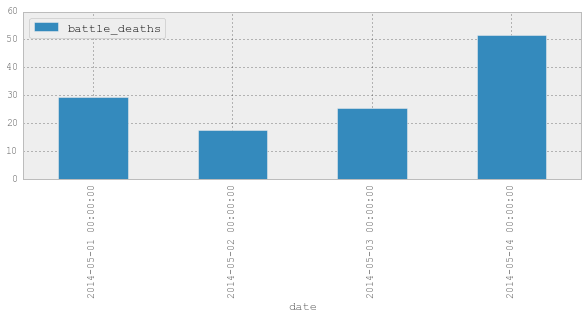

In [42]:
# индексация
print df['5/1/2014']  # df['2014-05-01'] 
print df['2014-05-03':'2014-05-04']
# переход к дням
print df.resample('D', how='mean').plot(kind='bar')

In [ ]:
# пересортировка df
df.sort_index(by = 'battle_deaths', inplace=True)
df

In [33]:
# работа со строками
df = pd.DataFrame({'name': [u'Маша', u'Саша', u'Рудольф'], 'mail':['1@mail.ru', 'Amail@vk.ru', '12_Wq@ru.ru']})
print df.mail.str.contains('mail')
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'
import re as re
df['mail'].str.match(pattern, flags=re.IGNORECASE)

0     True
1     True
2    False
Name: mail, dtype: bool


C:\Anaconda\lib\site-packages\pandas\core\strings.py:377: UserWarning: In future versions of pandas, match will change to always return a bool indexer.
  " always return a bool indexer.", UserWarning)


0      (1, mail, ru)
1    (Amail, vk, ru)
2    (12_Wq, ru, ru)
Name: mail, dtype: object

In [52]:
df = pd.DataFrame({'name': [u'Маша', u'Саша', u'Рудольф'], 'marks':[[2,3,3,5], [4,5,5], [2,3]]})
#print df
print df[df['marks'].map(lambda x: 3 in x)]

          marks     name
0  [2, 3, 3, 5]     Маша
2        [2, 3]  Рудольф


In [56]:
# выбор нескольких слуайных строк
print df.take(np.random.permutation(len(df))[:2])
# замена значения
print df.replace(u'Маша', u'Мария')

          marks     name
2        [2, 3]  Рудольф
0  [2, 3, 3, 5]     Маша
          marks     name
0  [2, 3, 3, 5]    Мария
1     [4, 5, 5]     Саша
2        [2, 3]  Рудольф


In [80]:
# Пример возможного извлечения признаков
lst = ['mark 10 12-10-2015', 'also 7 10-10-2014', 'take 2 01-05-2015']
df = pd.DataFrame({'x':lst})
df['num'] = df.x.str.extract('(\d+)')
df['date'] = df.x.str.extract('(..-..-....)')
df['word'] = df.x.str.extract('([a-z]\w{0,})')
df

,x,num,date,word
0,mark 10 12-10-2015,10,12-10-2015,mark
1,also 7 10-10-2014,7,10-10-2014,also
2,take 2 01-05-2015,2,01-05-2015,take


In [121]:
# pivot tables
df = pd.DataFrame({'ind1':[1,1,1,2,2,2,2], 'ind2':[1,1,2,2,3,3,2], 'x':[1,2,3,4,5,6,7], 'y':[1,1,1,1,1,1,2]})
print df
print df.pivot(index='x', columns='ind2', values='y')

dfp = df.pivot_table(index=['ind1','ind2'], aggfunc='sum') # отличается от df.set_index(['ind1', 'ind2'], drop=False)
dfp

   ind1  ind2  x  y
0     1     1  1  1
1     1     1  2  1
2     1     2  3  1
3     2     2  4  1
4     2     3  5  1
5     2     3  6  1
6     2     2  7  2
ind2   1   2   3
x               
1      1 NaN NaN
2      1 NaN NaN
3    NaN   1 NaN
4    NaN   1 NaN
5    NaN NaN   1
6    NaN NaN   1
7    NaN   2 NaN


x  y
ind1 ind2       
1    1      3  2
     2      3  1
2    2     11  3
     3     11  2

In [123]:
print dfp.sum(level='ind2')

dfp.swaplevel('ind1','ind2')

       x  y
ind2       
1      3  2
2     14  4
3     11  2


x  y
ind2 ind1       
1    1      3  2
2    1      3  1
     2     11  3
3    2     11  2

In [92]:
# MAP
df = pd.DataFrame({'CITY': [u'London', u'Moscow', u'Paris'], 'Stats': [0,2,1]})
d = {u'London':u'GB', u'Moscow':u'RUS', u'Paris':u'FR'}
df['country'] = df['CITY'].map(d)
df.columns = map(str.lower, df.columns)
df

,city,stats,country
0,London,0,GB
1,Moscow,2,RUS
2,Paris,1,FR


In [115]:
df = pd.DataFrame({'name': [u'Маша', u'Саша', u'Рудольф'], 'surname':[u'Петрова', u'Сидоров', u'Кац']})
print df.name
print df.surname

lst = []
for n, s in zip(df.name,  df.surname):
    lst.append(n + ' ' + s)
df['fullname'] = lst

df['fullname2'] = df[['name', 'surname']].apply(lambda x: x[0] + ' ' + x[1], axis=1)

df['fullname3'] = df['name'] + ' ' + df['surname']
print df

0       Маша
1       Саша
2    Рудольф
Name: name, dtype: object
0    Петрова
1    Сидоров
2        Кац
Name: surname, dtype: object
      name  surname      fullname     fullname2     fullname3
0     Маша  Петрова  Маша Петрова  Маша Петрова  Маша Петрова
1     Саша  Сидоров  Саша Сидоров  Саша Сидоров  Саша Сидоров
2  Рудольф      Кац   Рудольф Кац   Рудольф Кац   Рудольф Кац


In [130]:
df = pd.DataFrame({'name': ['Al', 'Max',  'Al'], 'surname':[u'Run', u'Crone', u'Run']})
print df.duplicated()
df.drop_duplicates(['name'], take_last=True) # df.drop_duplicates()

0    False
1    False
2     True
dtype: bool


,name,surname
1,Max,Crone
2,Al,Run


In [134]:
df = pd.DataFrame({'x':[12, 54, 10, 3], 'y':[2, 4, 1, 8]})
print df.rank() # номера по возрастанию
print df.idxmax() # индексы максимальных элементов

   x  y
0  3  2
1  4  3
2  2  1
3  1  4
x    1
y    3
dtype: int64


.ix is the combination of both .loc and .iloc. Integers are first considered labels, but if not found, falls back on positional indexing

In [137]:
df.drop('x', axis=1) # удаление столбцов // м.б. строк

,y
0,2
1,4
2,1
3,8


In [173]:
# сколько каждого значения
print pd.value_counts([3,2,2,2,5,3], sort=False)
# мода
print pd.DataFrame({'x': [3,2,2,2,5,3,3]}).mode()

2    3
3    2
5    1
dtype: int64
   x
0  2
1  3


In [141]:
# dummy-кодирование для категориальных признаков
pd.get_dummies([1,2,1,2,3])

,1,2,3
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1


In [ ]:
# pd.crosstab([df.company, df.experience], df.regiment,  margins=True)

In [ ]:
# нормализация



from sklearn import preprocessing


x = df['score'].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)